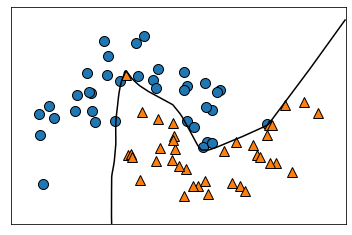

In [1]:
# 신경망 튜닝
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import mglearn
X, y = make_moons(n_samples = 100, noise = 0.25, random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver= 'lbfgs', random_state=0).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train);

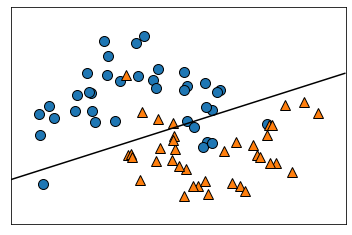

In [2]:
# 히든 레이어 제한
X, y = make_moons(n_samples = 100, noise = 0.25, random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver= 'lbfgs', random_state=0, hidden_layer_sizes=[1]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train);
# 신경망은 선형 회귀가 기초가 되기 때문에 히든 레이어 값을 1을 주면 직선을 갖게 된다.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


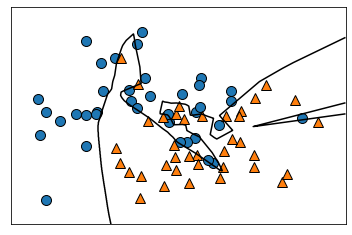

In [3]:
X, y = make_moons(n_samples = 100, noise = 0.5, random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver= 'lbfgs', random_state=0, hidden_layer_sizes=[100]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train);

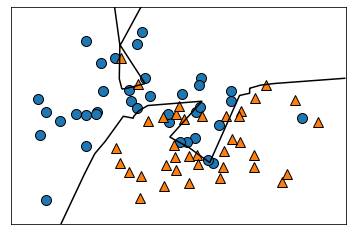

In [4]:
# 히든 레이어 개수 조절 (유닛을 늘리는 것보다 레이어 개수를 높이는 것이 정확도를 높이는데 유리하다)

X, y = make_moons(n_samples = 100, noise = 0.5, random_state =3)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver= 'lbfgs', random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train);

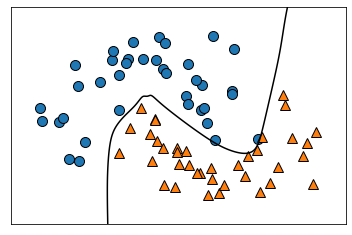

In [5]:
# tanh 활성화 함수가 적용된 10개 유닛으로 된 두개의 은닉층
X, y = make_moons(n_samples = 100, noise = 0.25, random_state =0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver= 'lbfgs',activation = 'tanh',random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train);

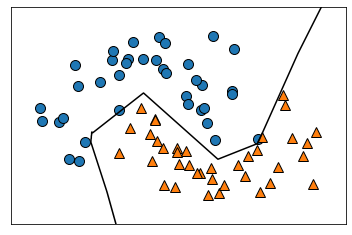

In [6]:
# 렐루 활성화 함수(tanh 활성화 함수와 비교했을때 날카로운 느낌이 듦)
X, y = make_moons(n_samples = 100, noise = 0.25, random_state =0)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 42)

mlp = MLPClassifier(solver= 'lbfgs',random_state=0, hidden_layer_sizes=[10,10]).fit(X_train, y_train)
mglearn.plots.plot_2d_separator(mlp, X_train)
mglearn.discrete_scatter(X_train[:,0],X_train[:,1], y_train);

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:500: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


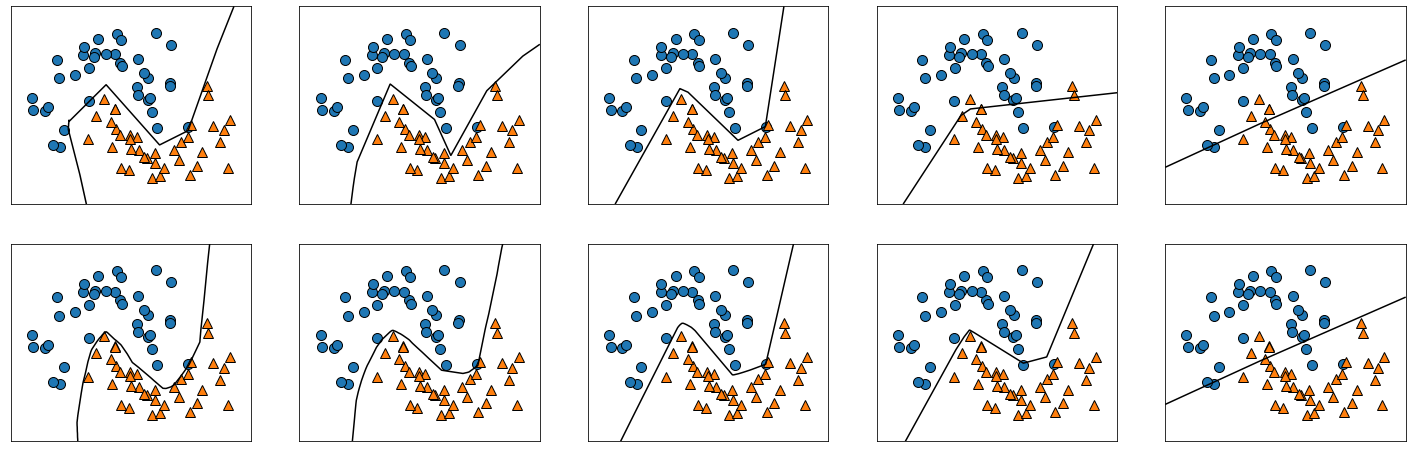

In [7]:
import matplotlib.pyplot as plt                   # node = unit 히든레이어 구성요소
fig, axes = plt.subplots(2, 5, figsize = (25, 8))
for ax_y, n_nodes in zip(axes, [10, 100]):
    for ax_x, alpha in zip(ax_y, [0.0001, 0.01, 0.1, 1, 3]):
        mlp = MLPClassifier(solver = 'lbfgs' , random_state = 0,
                           alpha = alpha, hidden_layer_sizes = [n_nodes, n_nodes])
        mlp.fit(X_train, y_train)
        mglearn.plots.plot_2d_separator(mlp, X_train, ax=ax_x)
        mglearn.discrete_scatter(X_train[:,0], X_train[:, 1], y_train, ax=ax_x)

In [8]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
cancer.data, cancer.target, random_state = 0 )

In [10]:
mlp = MLPClassifier(random_state=42).fit(X_train, y_train)

In [11]:
mlp.score(X_train, y_train)

0.9389671361502347

In [12]:
mlp.score(X_test, y_test)

0.916083916083916

In [13]:
train_mean = X_train.mean(axis=0)
train_mean

array([1.41591714e+01, 1.92330047e+01, 9.21438967e+01, 6.58415023e+02,
       9.63659859e-02, 1.03669601e-01, 8.86501308e-02, 4.91440610e-02,
       1.80473239e-01, 6.26169953e-02, 4.04795070e-01, 1.21222723e+00,
       2.84097934e+00, 4.06956737e+01, 6.98667371e-03, 2.50779930e-02,
       3.16993207e-02, 1.17015352e-02, 2.04367559e-02, 3.71274953e-03,
       1.63168169e+01, 2.56379812e+01, 1.07459131e+02, 8.87647887e+02,
       1.32503404e-01, 2.52836338e-01, 2.69481120e-01, 1.15279345e-01,
       2.89649296e-01, 8.35402582e-02])

In [14]:
train_std = X_train.std(axis=0)
train_std

array([3.54820940e+00, 4.11777749e+00, 2.44085763e+01, 3.60001771e+02,
       1.38386118e-02, 5.06235856e-02, 7.84252380e-02, 3.87729435e-02,
       2.76599707e-02, 6.84425158e-03, 2.86830175e-01, 5.45592960e-01,
       2.05927160e+00, 4.84585335e+01, 2.82332840e-03, 1.69519540e-02,
       3.14116890e-02, 5.90579400e-03, 8.19292513e-03, 2.62721557e-03,
       4.88905984e+00, 6.05754894e+00, 3.39251771e+01, 5.85664376e+02,
       2.29034367e-02, 1.51720808e-01, 1.98125175e-01, 6.55415896e-02,
       6.32173051e-02, 1.77743394e-02])

In [15]:
# 정규화(정규화를 하려면 기준을 세워야하기 때문에 테스트 데이터에도 훈련 평균값을 빼준다)
X_train_s = (X_train - train_mean)/train_std
X_test_s = (X_test - train_mean)/train_std

In [16]:
X_train_s.mean(axis=0)

array([-3.38513776e-15, -1.09510731e-15,  4.19278592e-15, -1.50427401e-15,
       -2.20546064e-15, -3.77803227e-16,  1.13967260e-15,  4.94062277e-16,
       -4.08906086e-15, -2.02837225e-15,  2.18395985e-16, -3.18993658e-16,
        2.86156075e-16, -6.48933176e-17,  2.70128208e-15, -4.25976416e-16,
        3.02053635e-16,  3.92552449e-16,  3.40624764e-16,  1.28418403e-15,
       -7.55785627e-17, -6.51539334e-17, -1.22306964e-15, -2.65828048e-17,
        4.43864429e-15, -1.11022913e-15, -5.05464215e-16,  1.10761687e-17,
       -2.45083036e-15,  2.71939487e-15])

In [17]:
X_train_s.std(axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [18]:
mlp = MLPClassifier(random_state=0).fit(X_train_s, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [19]:
mlp.score(X_train_s, y_train)

0.9906103286384976

In [20]:
mlp.score(X_test_s, y_test)

0.965034965034965

In [21]:
# 스케일링 데이터 적용 # y_train은 라벨링이다?
mlp = MLPClassifier(random_state=0, max_iter = 1000).fit(X_train_s, y_train)

In [22]:
mlp.score(X_train_s, y_train)

1.0

In [23]:
mlp.score(X_test_s, y_test)

0.972027972027972

In [24]:
# 분류 예측의 불확실성 추정

In [25]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import make_circles
X, y = make_circles(noise = 0.25, factor = 0.5, random_state=1)
# mglearn.discrete_scatter(X[:, 0], X[:, 1], y);
X_train, X_test, y_train, y_test = train_test_split(
X,y, random_state=0)
model = GradientBoostingClassifier(random_state=0).fit(X_train, y_train)
print(X_train.shape)
print(X_test.shape)

(75, 2)
(25, 2)


In [26]:
# 결정함수 decision_function
print(model.decision_function(X_test))
print(model.decision_function(X_test)>0)
print(y_test)
# 둘을 비교하여 1과 0을 구분 짓는 정도의 차이를 알 수 있다.

[ 4.13592603 -1.70169917 -3.95106099 -3.62609552  4.28986642  3.66166081
 -7.69097179  4.11001686  1.10753937  3.40782222 -6.46255955  4.28986642
  3.90156346 -1.20031247  3.66166081 -4.17231157 -1.23010079 -3.91576223
  4.03602783  4.11001686  4.11001686  0.65709014  2.69826265 -2.65673274
 -1.86776596]
[ True False False False  True  True False  True  True  True False  True
  True False  True False False False  True  True  True  True  True False
 False]
[1 0 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 0 0]


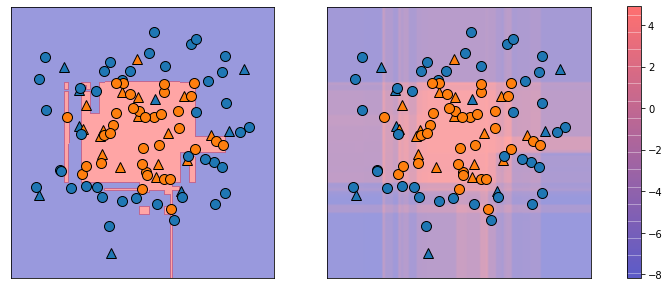

In [27]:
fig, axes = plt.subplots(1, 2, figsize = (13, 5))
mglearn.tools.plot_2d_separator(model, X, ax = axes[0], alpha= 0.4,
                               fill = True, cm=mglearn.cm2)

score_image = mglearn.tools.plot_2d_scores(model, X, ax = axes[1], alpha = 0.4,
                                          cm=mglearn.ReBl)

for ax in axes:
    mglearn.discrete_scatter(X_test[:,0], X_test[:,1], y_test,
                        markers='^', ax=ax)
    mglearn.discrete_scatter(X_train[:,0], X_train[:,1], y_train,
                        markers='o', ax=ax)
    
cbar = plt.colorbar(score_image, ax=axes.tolist())

In [28]:
# 예측확률
y_test

array([1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 0], dtype=int64)

In [29]:
model.predict_proba(X_test)

array([[1.57362639e-02, 9.84263736e-01],
       [8.45756526e-01, 1.54243474e-01],
       [9.81128693e-01, 1.88713075e-02],
       [9.74070327e-01, 2.59296728e-02],
       [1.35214212e-02, 9.86478579e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.99543275e-01, 4.56725221e-04],
       [1.61426376e-02, 9.83857362e-01],
       [2.48329911e-01, 7.51670089e-01],
       [3.20518935e-02, 9.67948107e-01],
       [9.98441637e-01, 1.55836338e-03],
       [1.35214212e-02, 9.86478579e-01],
       [1.98099245e-02, 9.80190075e-01],
       [7.68580365e-01, 2.31419635e-01],
       [2.50463747e-02, 9.74953625e-01],
       [9.84817480e-01, 1.51825198e-02],
       [7.73836215e-01, 2.26163785e-01],
       [9.80463909e-01, 1.95360915e-02],
       [1.73607896e-02, 9.82639210e-01],
       [1.61426376e-02, 9.83857362e-01],
       [1.61426376e-02, 9.83857362e-01],
       [3.41393574e-01, 6.58606426e-01],
       [6.30759509e-02, 9.36924049e-01],
       [9.34424749e-01, 6.55752512e-02],
       [8.661995

In [30]:
# CH10 P309

In [31]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
boston = load_boston()

In [32]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [36]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
# df.to_csv('my_boston.csv')

In [37]:
df # 가격 정보는 안나와있음

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [38]:
df['PRICE'] = boston.target
df
# df.to_csv('my_boston.csv')

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [39]:
# 외부 데이터를 가져왔을때 전처리
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
# y 분할
y = df['PRICE']
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: PRICE, Length: 506, dtype: float64

In [41]:
# X 분할
X = df.drop(['PRICE'], axis=1, inplace = False)
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [42]:
# 훈련용 평가용 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, test_size=0.3, random_state = 156)

In [43]:
# 선형 회귀 분석: 모델 생성 및 훈련
lr = LinearRegression().fit(X_train, y_train)

In [44]:
# 평가 데이터에 대한 예측 수행 -> 예측 결과 y_predict 구하기
y_predict = lr.predict(X_test)

In [45]:
# 실제값과 예측값 비교하기
print(y_test[:5])
print(y_predict[:5])

210    21.7
15     19.9
264    36.5
396    12.5
234    29.0
Name: PRICE, dtype: float64
[23.15424087 19.65590246 36.42005168 19.96705124 32.40150641]


In [46]:
# 에러값 구하기 
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)

In [47]:
print(mse)
print(rmse)

17.29691590790215
4.158956107955715


In [48]:
# y 절편 값 
lr.intercept_

40.995595172164336

In [49]:
# 회귀 계수
np.round(lr.coef_,2) # 4, 5의 변수가 영향을 많이 미치더라

array([-1.10e-01,  7.00e-02,  3.00e-02,  3.05e+00, -1.98e+01,  3.35e+00,
        1.00e-02, -1.74e+00,  3.60e-01, -1.00e-02, -9.20e-01,  1.00e-02,
       -5.70e-01])

In [50]:
# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
X_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

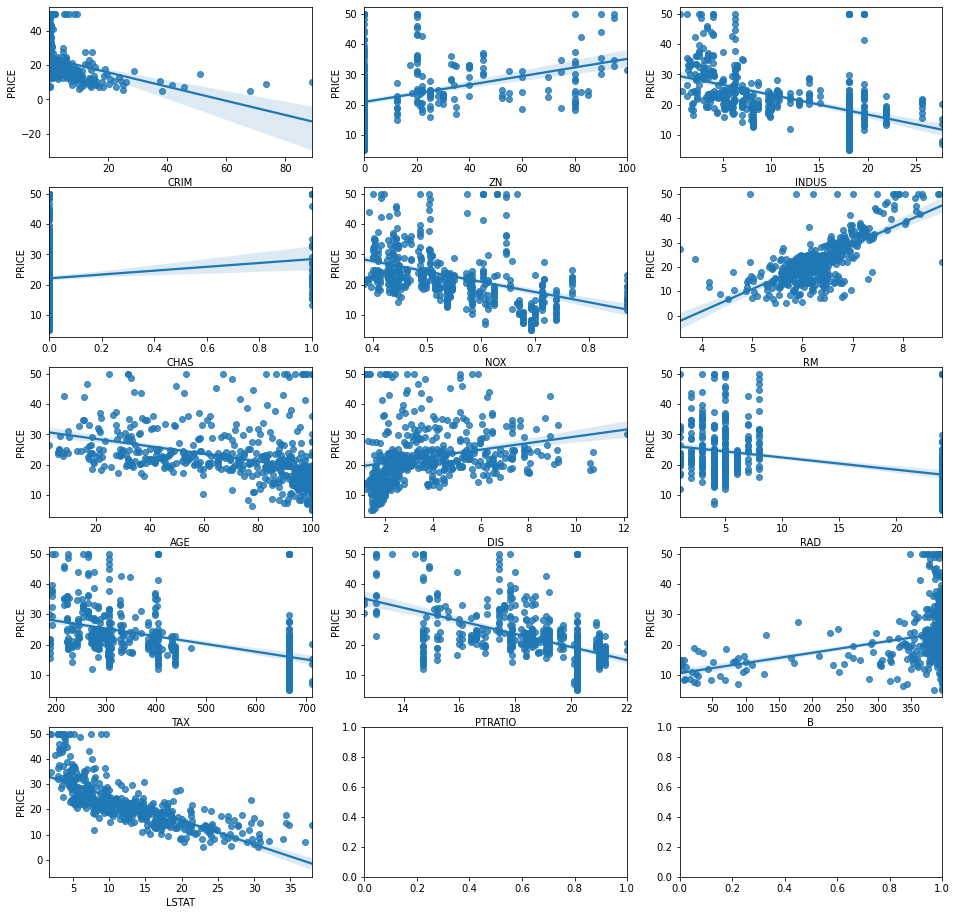

In [52]:
fig, axes = plt.subplots(5,3, figsize=(16, 16))
X_features = X_train.columns
for i, features in enumerate(X_features):
    row = int(i/3)
    col = i%3
    sns.regplot(x=features, y='PRICE', data = df, ax = axes[row][col])